# Exploratory data analysis of the Irish weather

### Reviewing the Data

In [36]:
#Loading the libraries required

import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
#Loading the dataset

weather = pd.read_csv('weather.csv',skiprows=11)   # read csv dataset file, skip intial rows 
weather.head()                                     # Print loaded dataset                                   

,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun
0,1,jan,2021,Dublin Airport,5.0,-1.9,0.0,8.8,19.0,6.6
1,2,jan,2021,Dublin Airport,3.5,-2.4,0.1,10.1,19.0,2.4
2,3,jan,2021,Dublin Airport,3.9,-2.5,4.1,9.2,30.0,0.6
3,4,jan,2021,Dublin Airport,5.3,2.2,0.5,11.5,27.0,0.6
4,5,jan,2021,Dublin Airport,5.2,1.2,1.0,9.5,25.0,1.0


##### Observations

The dataset has temperature recordings taken at **three airports (Dublin, Shannon, Cork)in Ireland**.

Records are collected everyday in **single year 2021**. 

Weather values included are days of year, location,
maximum and minimum temperatures, rain and avg. wind speed, highest gust, sunshine duration.

Temporal resolution is the spacing between datapoints/observations. Here we can see that **spacing between 
data is daily**.


In [38]:
# Type of data contained in columns of loaded dataset.
print('\n\n',weather.dtypes,'\n') 

#Finding unique stations of recording.
weather.station.unique()                                     



 day          int64
month       object
year         int64
station     object
maxtp      float64
mintp      float64
rain       float64
wdsp       float64
hg         float64
sun        float64
dtype: object 



array(['Dublin Airport', 'Shannon Airport', 'Cork Airport'], dtype=object)

In [39]:
# To check how many years are there in dataset
weather.year.unique()

array([2021])

In [40]:
# Which weather measurements reported?

# panda function to review header names.
list(weather) 

['day',
 'month',
 'year',
 'station',
 'maxtp',
 'mintp',
 'rain',
 'wdsp',
 'hg',
 'sun']

### Data Cleaning

In [41]:
#Finding missing records
weather.isna().sum()

day        0
month      0
year       0
station    0
maxtp      2
mintp      2
rain       4
wdsp       1
hg         3
sun        2
dtype: int64

##### Observations

There are two missing maximum and minimum temperature measurements, 4 missing rain measurements, 1 missing mean windspeed measurement, 3 missing highest gust measurements and 2 missing hours of sunlight measurements.


A plausible reason for the missing measurements is that the equipment was not working correctly on the days where there is no measurement. For example, the thermometer may have been broken on the days there were no temperature measurements. 

Filling the missing values with the mean would not be a very good strategy, as the mean is the average value across the year (and locations). A better strategy would be to fill the missing values with the mean for that month at that weather station. We still lose information about weather on that specific date with this method. To include information about the weather on the specific date of the missing measurement, we could compare the measurements at other locations with their mean values to see how close/far away they are from the mean value and use this relationship to determine an appropriate measurement at the weather station with the missing value.

In all cases, we are making inferences about the weather that may or not be true. Given that we do not have sufficient information about the true values, the best strategy is to leave them empty.

### Data Analysis

In [42]:
#nunique - gives the count of unique values, 
print ('Total number of stations: ' + str(weather.station.nunique())) 

#unique - prints unique column values
print ('Station names: ' ) 
print (weather.station.unique())

#Prints station names and records for each
weather.station.value_counts()

Total number of stations: 3
Station names: 
['Dublin Airport' 'Shannon Airport' 'Cork Airport']


Dublin Airport     365
Shannon Airport    365
Cork Airport       365
Name: station, dtype: int64

In [43]:
#Finding Lowest Temparature
#weather.iloc[weather.mintp.argmin()]

#get location of min of lowest temperature and store it in variable
lowestTemp = weather.loc[weather.mintp == weather.mintp.min()]                      

#display the required columns for the min of lowest temperature 
weather.iloc[lowestTemp.index, [0,1,2,3,5]]

,day,month,year,station,mintp
8,9,jan,2021,Dublin Airport,-5.9


In [44]:
#Finding Max rainfall Temparature

MaxRain = weather.loc[weather.rain == weather.rain.max()]                      
weather.iloc[MaxRain.index, [0,1,2,3,6]]

,day,month,year,station,rain
1029,27,oct,2021,Cork Airport,50.1


##### Observations

The lowest temperature was recorded at Dublin airport on January 9th 2021.

The largest amount of rainfall was recorded at Cork Airport on October 27th 2021.

### Statistical Analysis

In [45]:
#4. Create a numerical summary (mean, standard deviation, minimum, maximum, etc.) for each
#   of the weather measurements. Discuss and interpret your results.

# Explanation:
#      Describe function displays the statistical data of paramater provided.
#      Below we calculate statistical data of all weather points individually for the whole year.
#      This provides the count of datapoints, Min and max records.
#      Mean provides the average of all datapoints, whereas median (also 50% mentioned below) sorts 
#.     the datapoints and it is middle of the list.
#      These two above variables decide how the data is distributed.
#      (25,50,75%) are the quantiles of datapoints in which the maximum count of data is distributed.
    
#      1. Maxtp,Mintp - density of the datapoints are near to the avergae of max tp values as median and mean 
#        are close.
        
#      2. Rain - mean and median are far away hence this decribes there are more datapoints at the beginning 
#                 and some outliers which fetches the median far from mean.
        
#      3. Wind speed,highest gust,sun - This feature has normal curve but due to some outliers it stretches 
#                                     mean away from median.
     


#Code:
weather.describe()

,day,year,maxtp,mintp,rain,wdsp,hg,sun
count,1095.000000,1095.0,1093.000000,1093.000000,1091.000000,1094.000000,1092.000000,1093.000000
mean,15.720548,2021.0,13.732662,6.950046,2.596242,8.587020,22.863553,4.036780
std,8.800266,0.0,5.107554,4.687423,4.864790,3.705469,8.396710,3.958998
min,1.000000,2021.0,0.600000,-5.900000,0.000000,1.900000,7.000000,0.000000
25%,8.000000,2021.0,10.200000,3.400000,0.000000,6.000000,17.000000,0.300000
50%,16.000000,2021.0,13.400000,7.100000,0.300000,7.900000,21.000000,2.900000
75%,23.000000,2021.0,17.600000,10.700000,3.050000,10.600000,28.000000,6.600000
max,31.000000,2021.0,29.600000,18.700000,50.100000,26.300000,64.000000,15.200000


##### Observations
Unsurprisingly, the maximum air temperature has a higher mean of 13.73 C and the maximum air temperature has a 
lower mean of 6.95 C. Both measurements have similiar standard deviations. 
The median is approximately equal to the mean for both temperature measurements, 
indicating that their disctributions are symmetric.

The daily rain fall has a mean of 2.60 mm and standard deviation of 4.86 mm. 
The median (0.30 mm) is significantly lower than the mean, indicating that the distribution is right skewed.

The average windspeed has a mean of 8.59 knots, while the highest gust has a much larger mean of 22.86. 
The standard deviation for the largest gust is also higher. This is to be expected.

The mean hours of sunlight per day is 4.04, with a standard deviation 0f 3.96. 
The median is slighlty lower than the the mean, suggesting that the distribution may be right skewed 
(more days with less sunlight).

### Graphical Summary

Text(0, 0.5, 'Number of days')

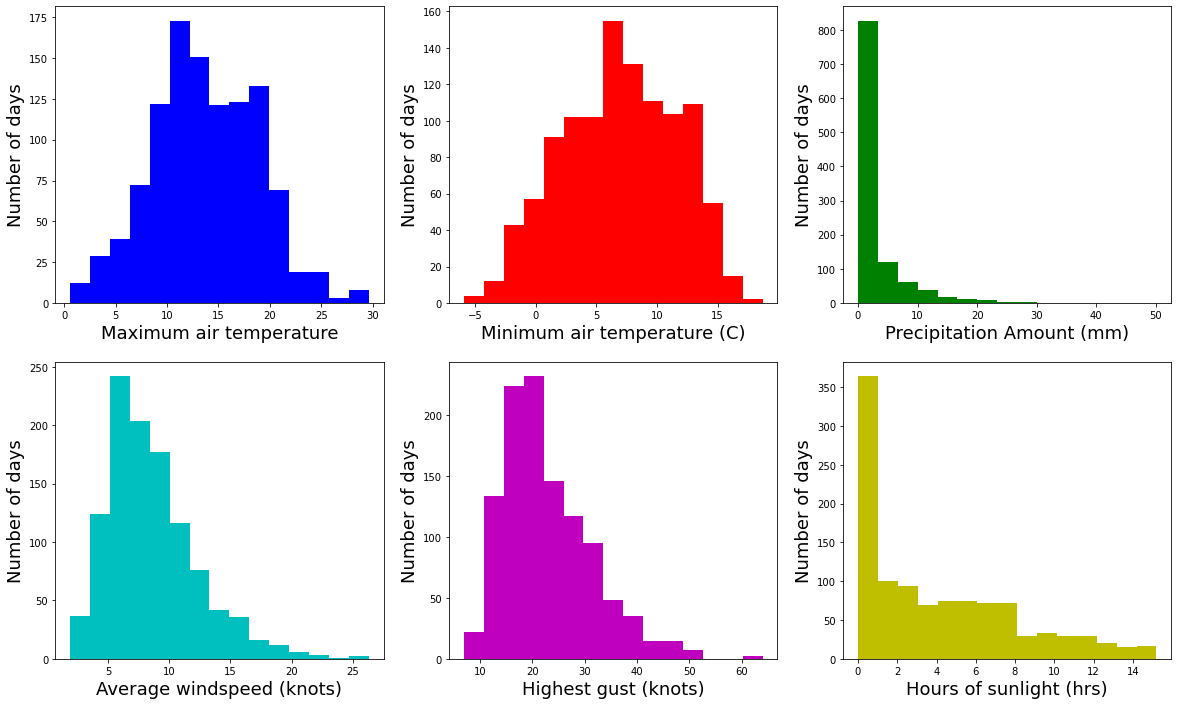

In [46]:
fig = plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
plt.hist(weather.maxtp, color='b', bins=15)
plt.xlabel('Maximum air temperature',size=18)
plt.ylabel('Number of days',size=18)

plt.subplot(2,3,2)
plt.hist(weather.mintp, color='r', bins=15)
plt.xlabel('Minimum air temperature (C)',size=18)
plt.ylabel('Number of days',size=18)

plt.subplot(2,3,3)
plt.hist(weather.rain, color='g', bins=15)
plt.xlabel('Precipitation Amount (mm)',size=18)
plt.ylabel('Number of days',size=18)

plt.subplot(2,3,4)
plt.hist(weather.wdsp, color='c', bins=15)
plt.xlabel('Average windspeed (knots)',size=18)
plt.ylabel('Number of days',size=18)

plt.subplot(2,3,5)
plt.hist(weather.hg, color='m', bins=15)
plt.xlabel('Highest gust (knots)',size=18)
plt.ylabel('Number of days',size=18)

plt.subplot(2,3,6)
plt.hist(weather.sun, color='y', bins=15)
plt.xlabel('Hours of sunlight (hrs)',size=18)
plt.ylabel('Number of days',size=18)

##### Observations

The two temperature measurements are, as expected from the numerical summaries, more or less symmetric. 
The centre's of each of these three graphes matches the mean/median, and the range/spread matches the min and 
max values.

The precipitation distribution is right skewed, which we predicted in the previous part. 
This makes sense, as there are many days that it rains just a little, but not many where it rains a lot. 
For the plot, we can see that there are over 800 days with little to no rain. 
Hence, we should not expect to have too many days with very heavy rainfall measurements.


The two windspeed measurements have a slight right-skew, with less days of high windspeeds than low windspeeds.

As expected, distribution of hours of sunlight is also right skewed. 
There are in fact a large number of days (~350) with little to no sunlight. 
These would correspond to overcast days, which we get quite often in Ireland.

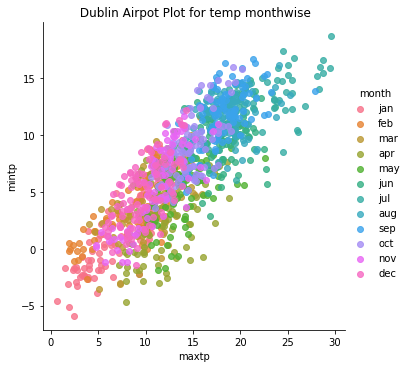

In [47]:
import seaborn as sns
sns.lmplot(x='maxtp', y='mintp', data=weather, hue='month',fit_reg=False).set(title=
                                                ' Dublin Airpot Plot for temp monthwise')
plt.show()

##### Observations

As one would expect, as the maximum and minimum daily temperatures are positively correlated. 
If the maximum temperature for the day is high, the minimum temperature will also be higher. 
Also unsurprisingly is the fact that the tempertures (both min and max) are higher during the summer months 
(July, Aug, Oct) and lowest in the winter months (Dec, Jan, Feb). 

A somewhat less obvious observation is that the minimum temperatures are higher in Autumn than in Spring 
(greenish points lower than the purpleish points).

In [48]:
#Adding new variable representing temperature range
weather['temp_range'] = weather.maxtp - weather.mintp
weather.head()

,day,month,year,station,maxtp,mintp,rain,wdsp,hg,sun,temp_range
0,1,jan,2021,Dublin Airport,5.0,-1.9,0.0,8.8,19.0,6.6,6.9
1,2,jan,2021,Dublin Airport,3.5,-2.4,0.1,10.1,19.0,2.4,5.9
2,3,jan,2021,Dublin Airport,3.9,-2.5,4.1,9.2,30.0,0.6,6.4
3,4,jan,2021,Dublin Airport,5.3,2.2,0.5,11.5,27.0,0.6,3.1
4,5,jan,2021,Dublin Airport,5.2,1.2,1.0,9.5,25.0,1.0,4.0


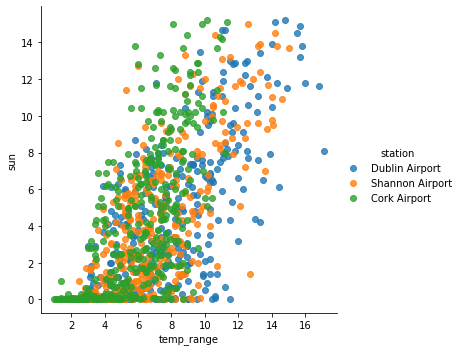

In [49]:
#Plotting newly created data 
sns.lmplot(x = 'temp_range', y = 'sun', data=weather, hue='station',fit_reg=False)
plt.show()

##### Observations

There seems to be a weak positive correlation between daily temperature range and hours of sunlight. 
On days when there is a lot of sunlight (clear skys) the temperature range tends to be great.
We also see that the temperature range tends to be higher in Dublin compared to Cork, 
particularly on days with lots of sunlight (blue dots more to the right than green points). 
The measurements for Shannon span across those for Dublin and Cork.

### Comparitive Analysis

In [50]:
print('Dublin Airport')
weather.loc[weather.station=='Dublin Airport'].drop(['day','year'],axis=1).describe()

Dublin Airport


,maxtp,mintp,rain,wdsp,hg,sun,temp_range
count,364.000000,364.000000,364.000000,365.000000,364.000000,364.000000,364.000000
mean,13.590934,6.001099,1.828846,8.625753,22.623626,4.089835,7.589835
std,5.258806,4.748774,3.878082,3.456376,7.790196,3.981802,3.199411
min,1.500000,-5.900000,0.000000,2.600000,10.000000,0.000000,1.400000
25%,10.000000,2.000000,0.000000,6.100000,17.000000,0.500000,5.200000
50%,13.300000,6.200000,0.100000,7.900000,21.000000,2.900000,7.350000
75%,18.100000,9.900000,1.325000,10.500000,27.250000,6.800000,9.800000
max,26.800000,15.800000,26.900000,24.400000,50.000000,15.200000,17.100000


In [51]:
print('Shannon Airport')
weather.loc[weather.station=='Shannon Airport'].drop(['day','year'],axis=1).describe()

Shannon Airport


,maxtp,mintp,rain,wdsp,hg,sun,temp_range
count,364.000000,364.000000,365.000000,365.000000,363.000000,364.000000,364.000000
mean,14.368681,7.611813,2.549041,7.815342,21.796143,3.856044,6.756868
std,5.175728,4.820239,4.007511,3.575878,8.372032,3.817264,2.834320
min,0.600000,-4.600000,0.000000,1.900000,8.000000,0.000000,1.700000
25%,11.100000,4.275000,0.000000,5.400000,16.000000,0.400000,4.800000
50%,14.100000,7.650000,0.500000,6.900000,20.000000,2.700000,6.300000
75%,18.000000,11.525000,3.400000,9.700000,26.000000,6.200000,8.425000
max,29.600000,18.700000,20.700000,25.800000,61.000000,15.000000,15.000000


In [52]:
print('Cork Airport')
weather.loc[weather.station=='Cork Airport'].drop(['day','year'],axis=1).describe()

Cork Airport


,maxtp,mintp,rain,wdsp,hg,sun,temp_range
count,365.000000,365.000000,362.000000,364.000000,365.000000,365.000000,365.000000
mean,13.239726,7.236438,3.415470,9.321978,24.164384,4.164110,6.003288
std,4.826949,4.339971,6.234737,3.924194,8.843284,4.077572,2.342826
min,1.900000,-2.700000,0.000000,2.400000,7.000000,0.000000,1.000000
25%,9.900000,3.800000,0.000000,6.600000,18.000000,0.200000,4.300000
50%,12.800000,6.900000,0.600000,8.500000,23.000000,3.100000,6.200000
75%,16.800000,11.100000,4.300000,11.200000,29.000000,7.000000,7.800000
max,25.700000,17.400000,50.100000,26.300000,64.000000,15.200000,11.300000


Text(0, 0.5, 'Sunlight (hours)')

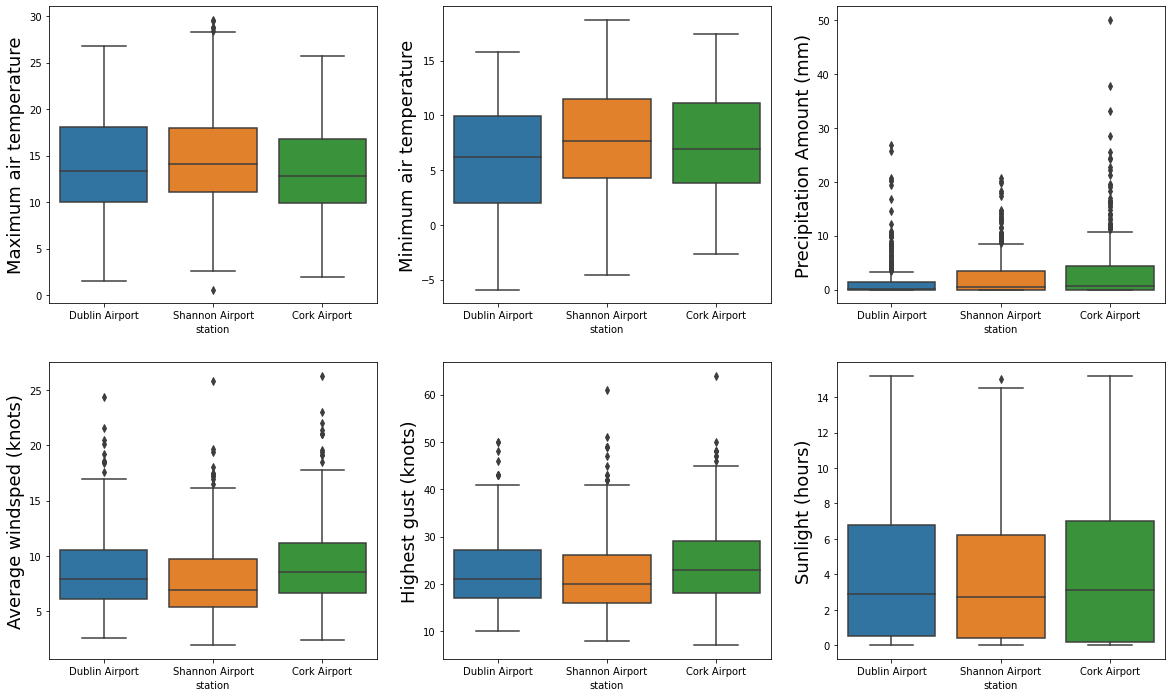

In [53]:
fig = plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.boxplot(data=weather, x="station", y="maxtp", orient="v")
plt.ylabel('Maximum air temperature',size=18)

plt.subplot(2,3,2)
sns.boxplot(data=weather, x="station", y="mintp", orient="v")
plt.ylabel('Minimum air temperature',size=18)

plt.subplot(2,3,3)
sns.boxplot(data=weather, x="station", y="rain", orient="v")
plt.ylabel('Precipitation Amount (mm)',size=18)

plt.subplot(2,3,4)
sns.boxplot(data=weather, x="station", y="wdsp", orient="v")
plt.ylabel('Average windsped (knots)',size=18)

plt.subplot(2,3,5)
sns.boxplot(data=weather, x="station", y="hg", orient="v")
plt.ylabel('Highest gust (knots)',size=18)

plt.subplot(2,3,6)
sns.boxplot(data=weather, x="station", y="sun", orient="v")
plt.ylabel('Sunlight (hours)',size=18)


##### Observations

On average, the maximum daily temperature is slightly higher in Shannon, with a mean of 14.4 C (median 14.1 C) 
compared to 13.6 C (median 13.3 C) in Dublin and 13.2 C (median 12.8 C) in Cork. 
The highest daily temperature was also in Shannon, at 29.6 C. This agrees with the boxplots which show a higher 
median in Shannon, as well as a number of high temperature outliers for Shannon. 
In terms of minimum daily temperature, Cork and Shannon are similar, with Dublin having a mean minimum daily 
temperature of 1-1.5 C lower. Looking at the boxplots Cork and Shannon have similar IQRs, but the range of 
minimum daily temperature is larger in Shannon. The boxplot for Dublin is shifted down, indicating a lower 
minimum daily temperature, as expected.

The west of Ireland is know for getting more rain than the east. 
Hence, it is not surprising that the lowest average rainfall is in Dublin. 
The rainest day by far was recorded in Cork (50.1 mm compared to 26.9 mm in Dublin). 
From the boxplots, the range and IQR are significantly smalled for Dublin. 
However, Dublin appears to have more heavy rainfall outliers than Shannon, but less than Cork. 

Cork was the wettest location in 2021.
The average windspeeds are comparable, with Cork having slightly stronger average windspeeds, 9.32 knots compared 
to 8.63 knots (Dublin) and 7.82 knots (Shannon). The boxplots show that Shannon has a slightly lower range and IQR,
but a similarly large high windspeed outlyier as Cork. Cork also had stronger gusts, with a mean of 24.2 knots 
(median 23 knots) compared to 22.6 knots (median 21.0 knots) in Dublin and 21.8 knots (median 20.0) in Shannon. 
The boxplots support these findings, with Cork having the largest range and IQR, and the highest median highest 
gust.

Finally, the average hours of sunlight per day is comparable across locations; Dublin 4.1 hrs (median 2.9 hrs), 
Shannon 3.9 hrs (median 2.7 hrs), Cork 4.2 hrs (median 3.1 hrs). 
The standard deviation, interquartile range and range are all very similar, which can also been seen on the 
boxplots.